In [2]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

In [10]:
import sys
sys.path.append("..")

from pivot import metric
from pivot.transform import PivotSpace
import pivot.plot as plotting
import pivot.generate as gen
from pivot.query import RangeQuery

%load_ext autoreload
%autoreload 2

In [11]:
from dataclasses import dataclass

In [43]:
@dataclass
class Pto3DQuery:
    # distances of the query from the three pivots 
    q = np.asarray((1,2,3))
    # query range in the metric space
    r = 2
    # distances between all pairs of pivots:
    kappa = np.asarray(([0,3,5],[3,0,7],[5,7,0]))

    def is_prunable(self, point):
        """Using Ptolemy's inequality, is the approximated distance between
        `point` and `self.q` high enough to rule the point being a candidate? 

        `point` can be either a single point of shape [3] or a point array of
        shape [3, n].
        """
        prune = lambda a,b: self._is_prunable_from_dims(point,a,b) 
        return prune(0,1) & prune(1,2) & prune(2,0)
    
    def _is_prunable_from_dims(self, point, dim_a, dim_b):
        c_ab = self.r * self.kappa[dim_a, dim_b]
        minimum = 1/q[dim_b] * (q[dim_a] * point[dim_b] - c_ab)
        maximum = 1/q[dim_b] * (q[dim_a] * point[dim_b] + c_ab)
        return (minimum < point[dim_a]) & (maximum > point[dim_a])

In [61]:
[1,10,0,0]

0

In [69]:
SAMPLES = 20
cube = np.indices((SAMPLES,SAMPLES,SAMPLES))
point_cloud = cube / SAMPLES * 3
point_array = point_cloud.reshape(3,-1)

query = Pto3DQuery()
is_in_query_range = query.is_prunable(point_array)
voxelarray = is_in_query_range.reshape(SAMPLES,SAMPLES,SAMPLES)

In [86]:
r_range.T

array([[-1,  3],
       [ 0,  4],
       [ 1,  5]])

TypeError: len() of unsized object

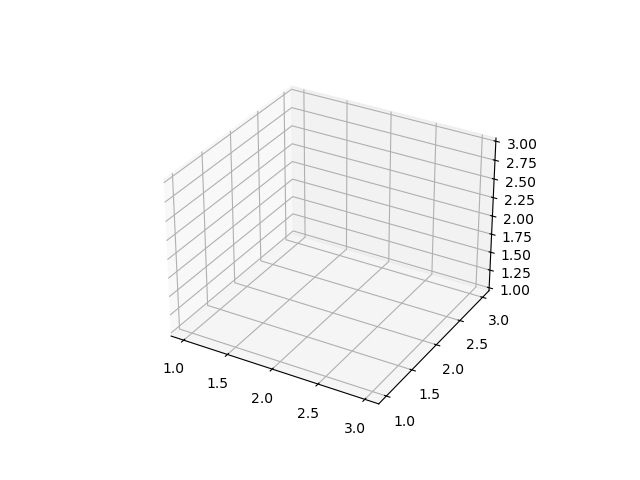

In [97]:
ax = plt.figure().add_subplot(projection='3d')
shape = np.array([[1,2,],[2,3,]])
ax.voxels(shape, shape, shape, filled=np.ones([1,1,1]),alpha=0.3)
plt.show()

TypeError: len() of unsized object

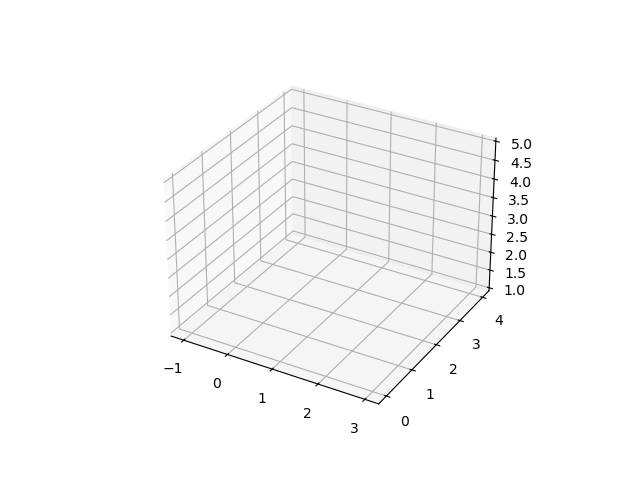

In [87]:
# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(~voxelarray,edgecolor='k')

r_range = query.q - query.r, query.q + query.r
r_range = np.asarray(r_range).T
ax.voxels(*r_range, np.ones([1,1,1]),alpha=0.3)
ax.scatter(*query.q, label="query")
ax.scatter(*query.kappa, label="pivots")
#

ax.legend()
plt.show()

In [ ]:

def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()